In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Processing ./.cache/pip/wheels/59/a1/76/8954a8efb2e143534be5943de94a245c673b25b9ce71c3aab3/scikit_posthocs-0.6.7-py3-none-any.whl
  Using cached researchpy-0.2.3-py3-none-any.whl (10 kB)


# Part 1: Clean dataset to make it ready for data analysis & combine the two dataset files into one dataframe

In [3]:
##Function to clean the dataframes##
def cleandata(filename):
  """
  Takes in csv file name in the format 'file_name.csv'
  Changes categorical variable columns and binary ordinal variable ('famsize' column) into string type
  Returns cleaned dataframe 
  """
  #load data
  mydf = pd.read_csv(filename) 

  #change categorical variables to string type
  mydf[['school', 'sex', 'address', 'Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities',
        'nursery','higher','internet','romantic']]=mydf[['school', 'sex', 'address', 'Pstatus','Mjob','Fjob','reason','guardian',
                                                         'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']].astype('string')
  #change 'famsize' column into string type too in case we use pd.get_dummies later 
  mydf['famsize']=mydf['famsize'].astype('string')
  return mydf

##Load the clean dataset files##
mathdf = cleandata('student-mat.csv') 
pordf = cleandata('student-por.csv') 



##Combine the two datasets (mathdf and pordf together)##
#add a column indicating if that row in the dataframe is for math or Portugese class
mathdf['subject']='math'
mathdf['subject']=mathdf['subject'].astype('string')
pordf['subject']='portuguese'
pordf['subject']=pordf['subject'].astype('string')

#concat the two dataframes together 
dataset = pd.concat([mathdf,pordf],axis=0)
dataset.reset_index(inplace=True)

# Part 2: Create visualizations on the two dataset files ('pordf' and 'mathdf') and combined dataset ('dataset'): here we examine period 1 grade ('G1'), period 2 grade ('G2'), and final grades ('G3')

a) create summary table showing mean and standard deviation

In [4]:
#show summary stats for G1, G2, G3 for all dataframes 
math_meanstd = mathdf.describe().loc[['mean', 'std'],['G1','G2','G3']]
por_meanstd = pordf.describe().loc[['mean', 'std'],['G1','G2','G3']]
dataset_meanstd = dataset.describe().loc[['mean', 'std'],['G1','G2','G3']]

summary_table = round(pd.concat([math_meanstd,por_meanstd,dataset_meanstd],axis = 0, ignore_index=True),2)
new_col = ['Math','','Portuguese','','Math+Portuguese combined','']
summary_table['Subject']=new_col
summary_table.set_index('Subject',inplace=True)
summary_table['']=['mean','std','mean','std','mean','std']
display(summary_table[['','G1','G2','G3']])

,,G1,G2,G3
Subject,,,,
Math,mean,10.91,10.71,10.42
,std,3.32,3.76,4.58
Portuguese,mean,11.40,11.57,11.91
,std,2.75,2.91,3.23
Math+Portuguese combined,mean,11.21,11.25,11.34
,std,2.98,3.29,3.86


b) create plots for datasets showing how grades differ by age, sex, and subject

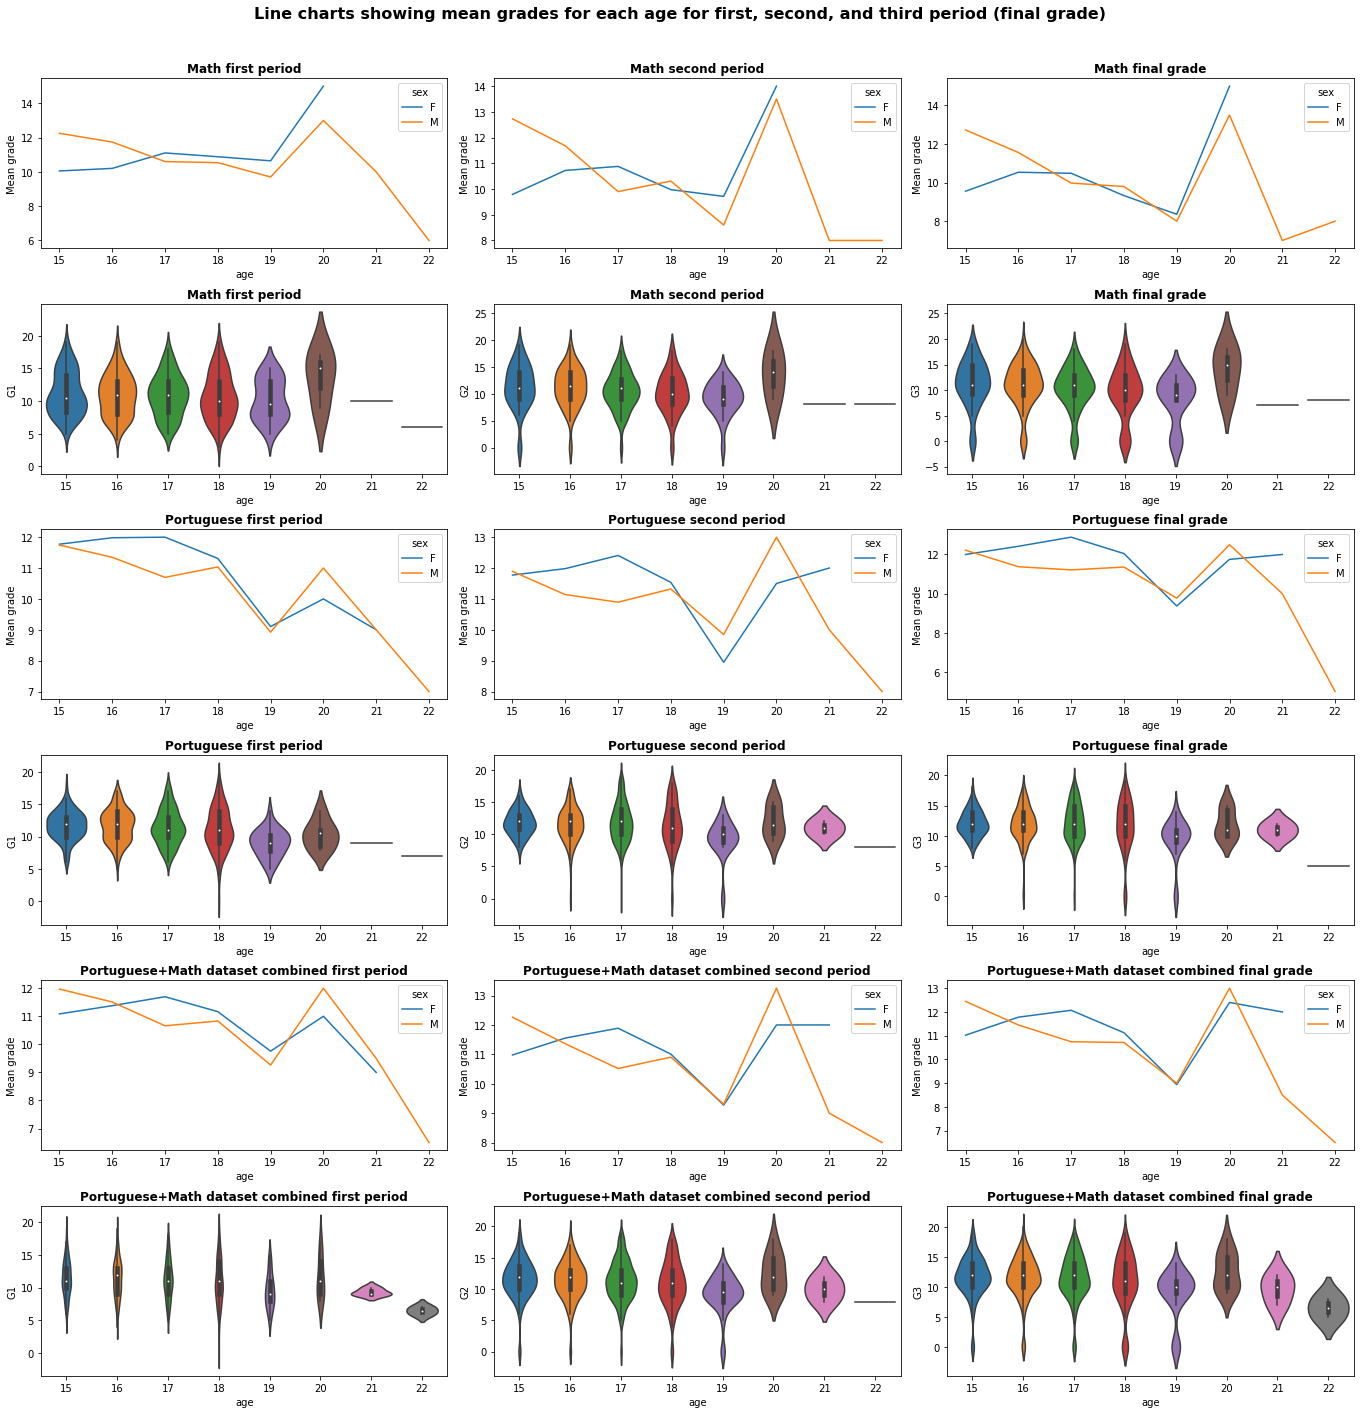

In [5]:
#plot line and violin plots showing how average first, second, and third period grades change by age (differentiate by sex) 
f, ax = plt.subplots(6, 3, figsize=(19,20))
f.suptitle('Line charts showing mean grades for each age for first, second, and third period (final grade)',fontweight='bold',fontsize=16)

#math data
ax[0,0].set_title('Math first period',fontweight="bold")
ax[0,0].set_ylabel('Mean grade')
sns.lineplot(y="G1", x="age", hue = "sex", estimator = "mean", ci=None, data=mathdf, ax=ax[0,0])
ax[0,1].set_title('Math second period',fontweight="bold")
ax[0,1].set_ylabel('Mean grade')
sns.lineplot(y="G2", x="age", hue = "sex", estimator = "mean", ci=None, data=mathdf, ax=ax[0,1])
ax[0,2].set_title('Math final grade',fontweight="bold")
ax[0,2].set_ylabel('Mean grade')
sns.lineplot(y="G3", x="age", hue = "sex", estimator = "mean", ci=None, data=mathdf, ax=ax[0,2])

ax[1,0].set_title('Math first period',fontweight="bold")
ax[1,0].set_ylabel('Mean grade')
sns.violinplot(y="G1", x="age", data=mathdf, ax=ax[1,0])
ax[1,1].set_title('Math second period',fontweight="bold")
ax[1,1].set_ylabel('Mean grade')
sns.violinplot(y="G2", x="age", data=mathdf, ax=ax[1,1])
ax[1,2].set_title('Math final grade',fontweight="bold")
ax[1,2].set_ylabel('Mean grade')
sns.violinplot(y="G3", x="age", data=mathdf, ax=ax[1,2])

#Portugese data
ax[2,0].set_title('Portuguese first period',fontweight="bold")
ax[2,0].set_ylabel('Mean grade')
sns.lineplot(y="G1", x="age", hue = "sex", estimator = "mean", ci=None, data=pordf, ax=ax[2,0])
ax[2,1].set_title('Portuguese second period',fontweight="bold")
ax[2,1].set_ylabel('Mean grade')
sns.lineplot(y="G2", x="age", hue = "sex", estimator = "mean", ci=None, data=pordf, ax=ax[2,1])
ax[2,2].set_title('Portuguese final grade',fontweight="bold")
ax[2,2].set_ylabel('Mean grade')
sns.lineplot(y="G3", x="age", hue = "sex", estimator = "mean", ci=None, data=pordf, ax=ax[2,2])

ax[3,0].set_title('Portuguese first period',fontweight="bold")
ax[3,0].set_ylabel('Mean grade')
sns.violinplot(y="G1", x="age", data=pordf, ax=ax[3,0])
ax[3,1].set_title('Portuguese second period',fontweight="bold")
ax[3,1].set_ylabel('Mean grade')
sns.violinplot(y="G2", x="age", data=pordf, ax=ax[3,1])
ax[3,2].set_title('Portuguese final grade',fontweight="bold")
ax[3,2].set_ylabel('Mean grade')
sns.violinplot(y="G3", x="age",data=pordf, ax=ax[3,2])

#math+Portugese class datasets combined 
ax[4,0].set_title('Portuguese+Math dataset combined first period',fontweight="bold")
ax[4,0].set_ylabel('Mean grade')
sns.lineplot(y="G1", x="age", hue = "sex", estimator = "mean", ci=None, data=dataset, ax=ax[4,0])
ax[4,1].set_title('Portuguese+Math dataset combined second period',fontweight="bold")
ax[4,1].set_ylabel('Mean grade')
sns.lineplot(y="G2", x="age", hue = "sex", estimator = "mean", ci=None, data=dataset, ax=ax[4,1])
ax[4,2].set_title('Portuguese+Math dataset combined final grade',fontweight="bold")
ax[4,2].set_ylabel('Mean grade')
sns.lineplot(y="G3", x="age", hue = "sex", estimator = "mean", ci=None, data=dataset, ax=ax[4,2])

ax[5,0].set_title('Portuguese+Math dataset combined first period',fontweight="bold")
ax[5,0].set_ylabel('Mean grade')
sns.violinplot(y="G1", x="age",data=dataset, ax=ax[5,0])
ax[5,1].set_title('Portuguese+Math dataset combined second period',fontweight="bold")
ax[5,1].set_ylabel('Mean grade')
sns.violinplot(y="G2", x="age", data=dataset, ax=ax[5,1])
ax[5,2].set_title('Portuguese+Math dataset combined final grade',fontweight="bold")
ax[5,2].set_ylabel('Mean grade')
sns.violinplot(y="G3", x="age", data=dataset, ax=ax[5,2])

f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()

d) create heatmaps to look at correlation between numerical attributes in the dataset

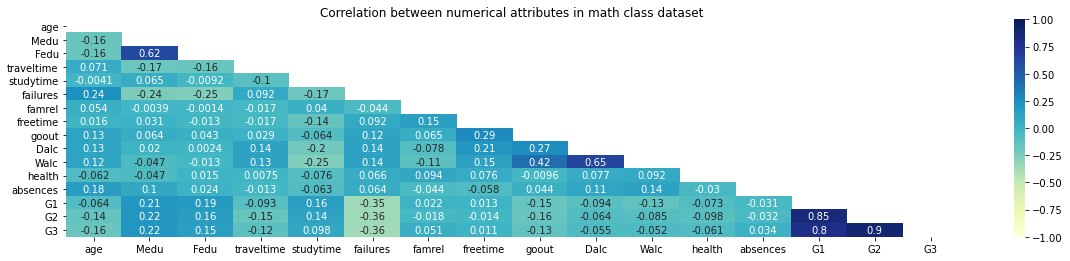

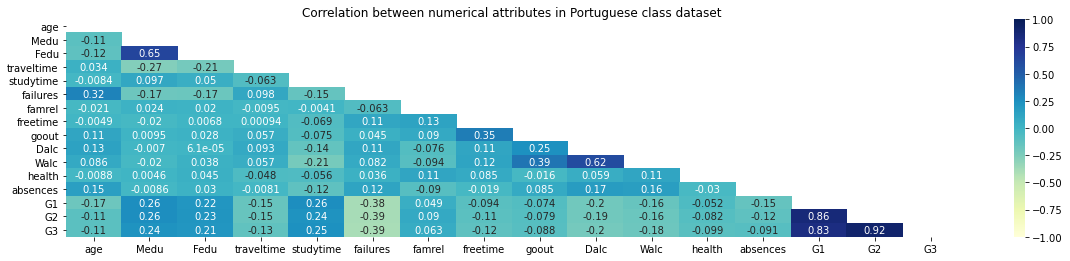

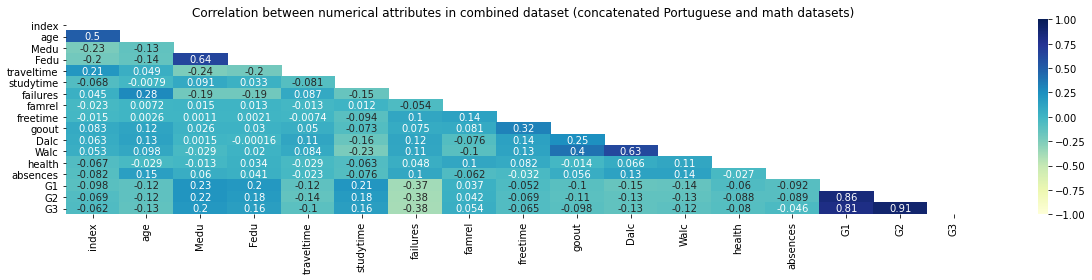

In [6]:
#plot heatmap to show correlation between all numerical attributes

#for math class data set heatmap
plt.figure(figsize=(20,4))
mymask = np.triu(np.ones_like(mathdf.corr()))
heatmap = sns.heatmap(mathdf.corr(),mask = mymask, vmin=-1, vmax=1, annot=True,cmap='YlGnBu')
heatmap.set_title('Correlation between numerical attributes in math class dataset', fontdict={'fontsize':12}, pad=1)

#for Portugese class data set heatmap
plt.figure(figsize=(20,4))
mymask = np.triu(np.ones_like(pordf.corr()))
heatmap = sns.heatmap(pordf.corr(),mask = mymask, vmin=-1, vmax=1, annot=True,cmap='YlGnBu')
heatmap.set_title('Correlation between numerical attributes in Portuguese class dataset', fontdict={'fontsize':12}, pad=1)

#for concatenated data set heatmap (using dataframe where we combined the Portugese and math dataframe)
plt.figure(figsize=(17,4))
mymask = np.triu(np.ones_like(dataset.corr()))
heatmap = sns.heatmap(dataset.corr(),mask = mymask, vmin=-1, vmax=1, annot=True,cmap='YlGnBu')
heatmap.set_title('Correlation between numerical attributes in combined dataset (concatenated Portuguese and math datasets)', fontdict={'fontsize':12}, pad=1)

plt.tight_layout()

# Part 3: Run t-tests for the binary attributes (use Welchs ttest),compute confidence interval, degrees of freedom, and Cohen's D for attributes that have p values less than alpha, 0.05

In [7]:
#define functions that we will use for this section 

#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

#code for Cohen's D 
#code copied directly from https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/lectures/statistical-power.ipynb

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)


Please note we calculate the sample size needed for each sample group to achieve a given power (in this case, 0.8) for the below t-tests. For the ratio input in TTestIndPower().solve_power, we calculated the ratio of one sample against the other based on the information we have from our dataset. Please remember, nobs 1 in the solve_power function is only the number of observations in one sample group. nobs 2 is thus the number of observations in the second sample group. And ratio*nobs2=nobs2. 

We confirmed this was the correct way to calculate things based on the words of joepy whose power functions including the statsmodel.solve_power function was merged into statsmodels. He states: ">>>smp.TTestIndPower().solve_power(0.3, power=0.75, ratio=2, alpha=0.05, alternative='larger') array([ 90.11015096])  In this case we need about 90 observations in sample 1, and about 180 observations in sample 2 I am not specifying the number of observations for the second sample, but instead I define ratio with nobs2 = nobs1 * ratio. I thought this would be more useful, since we can calculate the sample size to achieve a given power, when we want, for example, twice as many observations in one than the other sample". Original post: http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html

In [8]:
##Conduct family size t-test (LE3 is less than 3, GT3 is greater than 3)##

#create family size groups from dataset 
LE3_famsize = dataset[dataset['famsize']=='LE3']
GT3_famsize = dataset[dataset['famsize']=='GT3']

LE3_G3 = LE3_famsize['G3']
GT3_G3 = GT3_famsize['G3']

#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(LE3_G3,GT3_G3)
alpha = 0.05
power = 0.8
ratio_ =len(LE3_G3)/len(GT3_G3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for GT3_G3') 
print('Actual size of GT3_G3:', len(GT3_G3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for LE3_G3')
print('Actual size of LE3_G3:', len(LE3_G3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(LE3_G3, GT3_G3, equal_var=False)) #p value is significant

#calculate mean and standard deviation of groups 
#those with less than 3 in family show higher mean average score 
print('Mean Grades for period 3, LE3, GT3:',LE3_G3.mean(), GT3_G3.mean())
print('Standard deviation for period 3, LE3, GT3:',LE3_G3.std(), GT3_G3.std())

# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(LE3_G3), sms.DescrStatsW(GT3_G3))
print('Confidence interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(LE3_G3, GT3_G3))

Effect size (Cohen's D) for period 3 grades: 0.1345930572456909
Sample Size of nobs1: 1479.583 needed for GT3_G3
Actual size of GT3_G3: 738
Sample Size of nobs2: 613.486 needed for LE3_G3
Actual size of LE3_G3: 306
Ttest results for period 3 grades: Ttest_indResult(statistic=2.091111791391883, pvalue=0.03690810440658107)
Mean Grades for period 3, LE3, GT3: 11.709150326797385 11.18970189701897
Standard deviation for period 3, LE3, GT3: 3.500404837984712 3.998548198952353
Confidence interval for period 3: (0.03166431552138754, 1.007232544035441)
DOF for period 3: 646.0546929322937


In [9]:
## Conduct parent living status t-test (A is parents live apart T is parents live together)##pvalue not significant

#create groups from dataset 
apart = dataset[dataset['Pstatus']=='A']
tgt = dataset[dataset['Pstatus']=='T']

apart_g3 = apart['G3']
tgt_g3 = tgt['G3']

#conduct power analysis 
effect_size = Cohens_d(apart_g3,tgt_g3)
alpha = 0.05
power = 0.8
ratio_ =len(apart_g3)/len(tgt_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for tgt') 
print('Actual size of tgt:', len(apart_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for apart')
print('Actual size of apart:', len(tgt_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(apart_g3, tgt_g3, equal_var=False)) #pvalue not significant

#group means  
print('Mean Grades for period 3, live apart, live tgt:',apart_g3.mean(), tgt_g3.mean())
print('Standard deviation for period 3, live apart, live tgt:',apart_g3.std(), tgt_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(apart_g3), sms.DescrStatsW(tgt_g3))
print('Confidence interval for period 3:',cm.tconfint_diff(usevar='unequal'))

Effect size (Cohen's D) for period 3 grades: 0.09583778582637761
Sample Size of nobs1: 7374.766 needed for tgt
Actual size of tgt: 121
Sample Size of nobs2: 966.789 needed for apart
Actual size of apart: 923
Ttest results for period 3 grades: Ttest_indResult(statistic=1.049220313413276, pvalue=0.2956711670698838)
Mean Grades for period 3, live apart, live tgt: 11.669421487603305 11.299024918743228
Standard deviation for period 3, live apart, live tgt: 3.617983853271658 3.8958052309408524
Confidence interval for period 3: (-0.3268256972721062, 1.0676188349922597)


In [10]:
## Conduct address t-test (home type; R for rural, U for urban) ##p values significant 

#create groups from dataset 
rural = dataset[dataset['address']=='R']
urban = dataset[dataset['address']=='U']

rural_g3 = rural['G3']
urban_g3 = urban['G3']

#conduct power analysis 
effect_size = Cohens_d(rural_g3,urban_g3)
alpha = 0.05
power = 0.8
ratio_ =len(rural_g3)/len(urban_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for urban') 
print('Actual size of urban:', len(urban_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for rural')
print('Actual size of rural:', len(rural_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(rural_g3,urban_g3, equal_var=False)) #p value is significant 

#compute group means and standard deviation
#those living in urban areas score higher 
print('Mean Grades for period 3, rural, urban:',rural_g3.mean(), urban_g3.mean())
print('Standard deviation for Grades for period 3, rural, urban:',rural_g3.std(), urban_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(rural_g3), sms.DescrStatsW(urban_g3))
print('Confidence interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(rural_g3, urban_g3))

Effect size (Cohen's D) for period 3 grades: -0.26578463682910025
Sample Size of nobs1: 408.409 needed for urban
Actual size of urban: 759
Sample Size of nobs2: 153.355 needed for rural
Actual size of rural: 285
Ttest results for period 3 grades: Ttest_indResult(statistic=-3.7383845108519385, pvalue=0.00020714068694195503)
Mean Grades for period 3, rural, urban: 10.6 11.620553359683795
Standard deviation for Grades for period 3, rural, urban: 3.9825322823904 3.7849025472703635
Confidence interval for period 3: (-1.5569397011625277, -0.4841670182050628)
DOF for period 3: 488.2627086645791


In [11]:
## Conduct ttest for family educational support (yes or no) ##pvalue not significant

#create groups from dataset 
famsupy = dataset[dataset['famsup']=='yes']
famsupn = dataset[dataset['famsup']=='no']

famsupy_g3 = famsupy['G3']
famsupn_g3 = famsupn['G3']

#conduct power analysis 
effect_size = Cohens_d(famsupn_g3,famsupy_g3)
alpha = 0.05
power = 0.8
ratio_ =len(famsupy_g3)/len(famsupn_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for famsupn') 
print('Actual size of nobs1:', len(famsupn_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for famsupy')
print('Actual size of nobs2:', len(famsupy_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(famsupy_g3,famsupn_g3, equal_var=False)) #pvalue not significant

#compute group mean and standard deviation
print('Mean Grades for period 3, with family edu support, without family edu support:',famsupy_g3.mean(), famsupn_g3.mean())
print('Standard deviation for period 3 grades, with family edu support, without family edu support:',famsupy_g3.std(), famsupn_g3.std())

#confidence interval 
cm_one = sms.CompareMeans(sms.DescrStatsW(famsupy_g3), sms.DescrStatsW(famsupn_g3))
print('Confidence interval for period 3:',cm_one.tconfint_diff(usevar='unequal'))

Effect size (Cohen's D) for period 3: -0.027308946562181288
Sample Size of nobs1: 17168.646 needed for famsupn
Actual size of nobs1: 404
Sample Size of nobs2: 27197.855 needed for famsupy
Actual size of nobs2: 640
Ttest results for period 3 grades: Ttest_indResult(statistic=0.4222486353100313, pvalue=0.6729559836098415)
Mean Grades for period 3, with family edu support, without family edu support: 11.3828125 11.277227722772277
Standard deviation for period 3 grades, with family edu support, without family edu support: 3.7456727119364324 4.050227605971357
Confidence interval for period 3: (-0.38524714944624894, 0.596416703901694)


In [12]:
## Conduct extra paid classes within course subject t-test (yes or no) ##pvalue not significant

#create groups from dataset
paid_y = dataset[dataset['paid']=='yes']
paid_n = dataset[dataset['paid']=='no']

paid_y_g3 = paid_y['G3']
paid_n_g3 = paid_n['G3']

#conduct power analysis 
effect_size = Cohens_d(paid_y_g3, paid_n_g3)
alpha = 0.05
power = 0.8
ratio_ =len(paid_y_g3)/len(paid_n_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for paid_n') 
print('Actual size of nobs1:', len(paid_n_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for paid_y')
print('Actual size of nobs2:', len(paid_y_g3))


#conduct ttest 
print('Ttest results for period 3 grades:',stats.ttest_ind(paid_y_g3, paid_n_g3, equal_var=False)) #pvalue not significant

#compute group mean and standard deviation
print('Mean Grades for period 3, with extra paid class, without extra paid class:',paid_y_g3.mean(), paid_n_g3.mean())
print('Standard deviation for period 3 grades, with extra paid class, without extra paid class:',paid_y_g3.std(), paid_n_g3.std())

#confidence interval 
cm_one = sms.CompareMeans(sms.DescrStatsW(famsupy_g3), sms.DescrStatsW(famsupn_g3))
print('Confidence interval for period 3:',cm_one.tconfint_diff(usevar='unequal'))

Effect size (Cohen's D) for period 3: -0.12113284196809829
Sample Size of nobs1: 2539.920 needed for paid_n
Actual size of nobs1: 824
Sample Size of nobs2: 678.134 needed for paid_y
Actual size of nobs2: 220
Ttest results for period 3 grades: Ttest_indResult(statistic=-1.6666036115857088, pvalue=0.09644771326365298)
Mean Grades for period 3, with extra paid class, without extra paid class: 10.972727272727273 11.440533980582524
Standard deviation for period 3 grades, with extra paid class, without extra paid class: 3.637599416417549 3.919463561667285
Confidence interval for period 3: (-0.38524714944624894, 0.596416703901694)


In [13]:
##Conduct romantic relationship t-test (yes or no)##

#create groups from dataset 
romanticy = dataset[dataset['romantic']== 'yes']
romanticn = dataset[dataset['romantic']== 'no']

romanticy_g3 = romanticy['G3']
romanticn_g3 = romanticn['G3']

#conduct power analysis 
effect_size = Cohens_d(romanticy_g3, romanticn_g3)
alpha = 0.05
power = 0.8
ratio_ =len(romanticy_g3)/len(romanticn_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for romantic no') 
print('Actual size of nobs1:', len(romanticn_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for romantic yes')
print('Actual size of nobs2:', len(romanticy_g3))

#conduct ttest 
print('Ttest results for period 3 grades:',stats.ttest_ind(romanticy_g3, romanticn_g3, equal_var=False)) #p value is significant 

#compute group means and standard deviation 
#those not in a romantic relationship have higher mean scores 
print('Mean grades for period 3, in romantic, not in romantic relationship:',romanticy_g3.mean(), romanticn_g3.mean())
print('Standard deviation for period 3, in romantic, not in romantic relationship:',romanticy_g3.std(), romanticn_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(romanticy_g3), sms.DescrStatsW(romanticn_g3))
print('Confidence interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(romanticy_g3, romanticn_g3))

Effect size (Cohen's D) for period 3 grades: -0.20631587684082908
Sample Size of nobs1: 520.122 needed for romantic no
Actual size of nobs1: 673
Sample Size of nobs2: 286.724 needed for romantic yes
Actual size of nobs2: 371
Ttest results for period 3 grades: Ttest_indResult(statistic=-3.073010149636668, pvalue=0.002203410408121672)
Mean grades for period 3, in romantic, not in romantic relationship: 10.830188679245284 11.62407132243685
Standard deviation for period 3, in romantic, not in romantic relationship: 4.16883608320455 3.659196268067467
Confidence interval for period 3: (-1.301119128349888, -0.28664615803324345)
DOF for period 3: 683.1808121604636


In [14]:
##Conduct extra-curc activities t-test (yes or no) ##p value is not significant 

#create groups from dataset 
extray = dataset[dataset['activities']=='yes']
extran = dataset[dataset['activities']=='no']

extray_g3 = extray['G3']
extran_g3 = extran['G3']

#conduct power analysis 
effect_size = Cohens_d(extray_g3, extran_g3)
alpha = 0.05
power = 0.8
ratio_ =len(extray_g3)/len(extran_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for extra curric no') 
print('Actual size of nobs1:', len(extran_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for extra curric yes')
print('Actual size of nobs2:', len(extray_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(extray_g3, extran_g3, equal_var=False)) #p value is not significant 


Effect size (Cohen's D) for period 3 grades: 0.06797536562808397
Sample Size of nobs1: 3437.772 needed for extra curric no
Actual size of nobs1: 528
Sample Size of nobs2: 3359.641 needed for extra curric yes
Actual size of nobs2: 516
Ttest results for period 3 grades: Ttest_indResult(statistic=1.0976748981078226, pvalue=0.2726008809202919)


In [15]:
##Conduct attended nursury school t-test (yes or no) #p value is not significant 

#gcreate groups from dataset 
nursy = dataset[dataset['nursery']=='yes']
nursn = dataset[dataset['nursery']=='no']

nursy_g3= nursy['G3']
nursn_g3 = nursn['G3']

#conduct power analysis 
effect_size = Cohens_d(nursy_g3, nursn_g3)
alpha = 0.05
power = 0.8
ratio_ =len(nursy_g3)/len(nursn_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for nursery no') 
print('Actual size of nobs1:', len(nursn_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for nursery yes')
print('Actual size of nobs2:', len(nursy_g3))

#conduct ttest 
print('Ttest results for period 3 grades:',stats.ttest_ind(nursy_g3, nursn_g3, equal_var=False)) #p value is not significant 

Effect size (Cohen's D) for period 3 grades: 0.09982206642454668
Sample Size of nobs1: 985.229 needed for nursery no
Actual size of nobs1: 209
Sample Size of nobs2: 3936.201 needed for nursery yes
Actual size of nobs2: 835
Ttest results for period 3 grades: Ttest_indResult(statistic=1.312676158221348, pvalue=0.19021249175590982)


In [16]:
## Conduct internet access at home t-test (yes or no) ##p value is significant 

#create groups from dataset 
internet_y = dataset[dataset['internet']=='yes']
internet_n = dataset[dataset['internet']=='no']

internety_g3 = internet_y['G3']
internetn_g3 = internet_n['G3']

#conduct power analysis 
effect_size = Cohens_d(internety_g3, internetn_g3)
alpha = 0.05
power = 0.8
ratio_ =len(internety_g3)/len(internetn_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for internet no') 
print('Actual size of nobs1:', len(internetn_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for internet yes')
print('Actual size of nobs2:', len(internety_g3))


#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(internety_g3, internetn_g3, equal_var = False)) #p value is significant 

#compute group means and standard deviations
#those with internet at home have a higher mean average score 
print('Mean grades for period 3, with internet, no internet:',internety_g3.mean(), internetn_g3.mean())
print('Standard deviation for period 3, with internet, no internet:',internety_g3.std(), internetn_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(internety_g3), sms.DescrStatsW(internetn_g3))
print('Period 3 confidence interval:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(internety_g3, internetn_g3))

Effect size (Cohen's D) for period 3 grades: 0.26512332985907094
Sample Size of nobs1: 141.364 needed for internet no
Actual size of nobs1: 217
Sample Size of nobs2: 538.745 needed for internet yes
Actual size of nobs2: 827
Ttest results for period 3 grades: Ttest_indResult(statistic=3.46895791791834, pvalue=0.0005902474556872205)
Mean grades for period 3, with internet, no internet: 11.553808948004837 10.534562211981568
Standard deviation for period 3, with internet, no internet: 3.841653242941083 3.8550056344593844
Period 3 confidence interval: (0.44129742845104847, 1.597196043595491)
DOF for period 3: 337.2488700472099


In [17]:
##Conduct gender t-test (F for female M for male) ##p value is not significant 

#create groups from dataset 
fem = dataset[dataset['sex']=='F']
mal = dataset[dataset['sex']=='M']

fem_g3 = fem['G3']
mal_g3 = mal['G3']

#conduct power analysis 
effect_size = Cohens_d(fem_g3, mal_g3)
alpha = 0.05
power = 0.8
ratio_ =len(fem_g3)/len(mal_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for male') 
print('Actual size of nobs1:', len(mal_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for female')
print('Actual size of nobs2:', len(fem_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(fem_g3, mal_g3, equal_var = False)) #p value is not significant 

#compute group means and standard deviations
#while not statistically sig females do score higher 
print('Mean grades for period 3, female, male:',fem_g3.mean(), mal_g3.mean())
print('Standard deviation for period 3, female, male:',fem_g3.std(), mal_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(fem_g3), sms.DescrStatsW(mal_g3))
print('Confidence interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(fem_g3, mal_g3))

Effect size (Cohen's D) for period 3 grades: 0.06347190218157432
Sample Size of nobs1: 3442.404 needed for male
Actual size of nobs1: 453
Sample Size of nobs2: 4491.083 needed for female
Actual size of nobs2: 591
Ttest results for period 3 grades: Ttest_indResult(statistic=1.0171940587826467, pvalue=0.3093133548182756)
Mean grades for period 3, female, male: 11.448392554991539 11.20309050772627
Standard deviation for period 3, female, male: 3.874334491331916 3.852167437619235
Confidence interval for period 3: (-0.22794147488216965, 0.7185455694127089)
DOF for period 3: 975.4108063696129


In [18]:
##Conduct school difference t-test ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)) ##p value is significant 

#create groups from dataset 
gp = dataset[dataset['school']=='GP']
ms = dataset[dataset['school']=='MS']

gp_g3 = gp['G3']
ms_g3 = ms['G3']


#conduct power analysis 
effect_size = Cohens_d(gp_g3, ms_g3)
alpha = 0.05
power = 0.8
ratio_ =len(gp_g3)/len(ms_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ms') 
print('Actual size of nobs1:', len(ms_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for gp')
print('Actual size of nobs2:', len(gp_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(gp_g3, ms_g3, equal_var = False)) #p value is significant

#compute group mean and standard deviations
#GP school kids score higher 
print('Mean grades for period 3, GP, MS:',gp_g3.mean(), ms_g3.mean())
print('Standard deviation for period 3, GP, MS:',gp_g3.std(), ms_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(gp_g3), sms.DescrStatsW(ms_g3))
print('Confidence Interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(gp_g3, ms_g3))

Effect size (Cohen's D) for period 3 grades: 0.291689946081111
Sample Size of nobs1: 125.254 needed for ms
Actual size of nobs1: 272
Sample Size of nobs2: 355.501 needed for gp
Actual size of nobs2: 772
Ttest results for period 3 grades: Ttest_indResult(statistic=4.086078141478657, pvalue=5.1683248417069236e-05)
Mean grades for period 3, GP, MS: 11.63341968911917 10.514705882352942
Standard deviation for period 3, GP, MS: 3.8092075240286367 3.908520910335972
Confidence Interval for period 3: (0.5806997457390749, 1.656727867793382)
DOF for period 3: 464.4497144351771


In [19]:
##NOTE: Ran t-tests for mother (Medu) and father (Fedu) education by splitting the groups into 2. 1 group for those with less than secondary school education (edu=0,1,2) and those with secondary education or higher (edu=3,4)##

##Conduct T-test for mother education level ##p value is significant

#create groups from dataset
group1_g3 = dataset[dataset['Medu']<3]['G3']
group2_g3 = dataset[dataset['Medu']>=3]['G3']

#conduct power analysis 
effect_size = Cohens_d(group1_g3, group2_g3)
alpha = 0.05
power = 0.8
ratio_ =len(group1_g3)/len(group2_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for group2 (sec education or higher group)') 
print('Actual size of nobs1:', len(group2_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for group 1 (less than sec education group)')
print('Actual size of nobs2:', len(group1_g3))

#conduct ttest for mother education level 
print('Ttest results for period 3 grades:',stats.ttest_ind(group1_g3, group2_g3, equal_var = False)) #p value is significant

#compute group means and standard deviations 
#mother with more than secondary school education have higher mean scores 
print('Mean grades for period 3, mother with more than sec school, mother with less than sec school education:',group1_g3.mean(), group2_g3.mean())
print('Standard devaiation in grades for period 3, mother with more than sec school, mother with less than sec school education:',group1_g3.std(), group2_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(group1_g3), sms.DescrStatsW(group2_g3))
print('Confidence Interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(group1_g3, group2_g3))

Effect size (Cohen's D) for period 3 grades: -0.33720921379889246
Sample Size of nobs1: 145.132 needed for group2 (sec education or higher group)
Actual size of nobs1: 544
Sample Size of nobs2: 133.394 needed for group 1 (less than sec education group)
Actual size of nobs2: 500
Ttest results for period 3 grades: Ttest_indResult(statistic=-5.449942174814411, pvalue=6.29246249440235e-08)
Mean grades for period 3, mother with more than sec school, mother with less than sec school education: 10.672 11.957720588235293
Standard devaiation in grades for period 3, mother with more than sec school, mother with less than sec school education: 3.7518754161454444 3.8679938917779237
Confidence Interval for period 3: (-1.748643862169482, -0.8227973143011038)
DOF for period 3: 1038.9743341265462


In [20]:
##Conduct T-test for father education level #p value is significant

#create groups from dataset 
group1_g3 = dataset[dataset['Fedu']<3]['G3']
group2_g3 = dataset[dataset['Fedu']>=3]['G3']

#conduct power analysis 
effect_size = Cohens_d(group1_g3, group2_g3)
alpha = 0.05
power = 0.8
ratio_ =len(group1_g3)/len(group2_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for group2 (sec education or higher group)') 
print('Actual size of nobs1:', len(group2_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for group 1 (less than sec education group)')
print('Actual size of nobs2:', len(group1_g3))

#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(group1_g3, group2_g3, equal_var = False)) #p value is significant

#compute group means and standard deviation 
#father with more than secondary school education have higher mean scores 
print('Mean grades for period 3, father with more than sec school, father with less than sec school education:',group1_g3.mean(), group2_g3.mean())
print('Standard devaiation in grades for period 3, father with more than sec school, father with less than sec school education:',group1_g3.std(), group2_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(group1_g3), sms.DescrStatsW(group2_g3))
print('Confidence Interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(group1_g3, group2_g3))

Effect size (Cohen's D) for period 3 grades: -0.2770324988979343
Sample Size of nobs1: 182.113 needed for group2 (sec education or higher group)
Actual size of nobs1: 455
Sample Size of nobs2: 235.746 needed for group 1 (less than sec education group)
Actual size of nobs2: 589
Ttest results for period 3 grades: Ttest_indResult(statistic=-4.489373139737249, pvalue=7.963155394343606e-06)
Mean grades for period 3, father with more than sec school, father with less than sec school education: 10.879456706281834 11.94065934065934
Standard devaiation in grades for period 3, father with more than sec school, father with less than sec school education: 3.974074449672632 3.6363915048640103
Confidence Interval for period 3: (-1.5250553423455164, -0.597349926409497)
DOF for period 3: 1012.6466049858743


In [21]:
##Conduct T-test for academic subject (Portuguese and Math)

#create groups from dataset 
math_g3 = dataset[dataset['subject']=='math']['G3']
por_g3 = dataset[dataset['subject']=='portuguese']['G3']

#conduct power analysis 
effect_size = Cohens_d(por_g3, math_g3)
alpha = 0.05
power = 0.8
ratio_ =len(math_g3)/len(por_g3) #NB: ratio = nobs2/nobs1

print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Portugueses subject') 
print('Actual size of nobs1:', len(por_g3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for math subject')
print('Actual size of nobs2:', len(math_g3))


#conduct ttest
print('Ttest results for period 3 grades:',stats.ttest_ind(por_g3, math_g3, equal_var = False)) #p value is significant

#compute group means and standard deviation 
#father with more than secondary school education have higher mean scores 
print('Mean grades for period 3, math and Portuguese:',math_g3.mean(), por_g3.mean())
print('Standard devaiation in grades for period 3, math and Portuguese:',math_g3.std(), por_g3.std())

#confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(math_g3), sms.DescrStatsW(por_g3))
print('Confidence Interval for period 3:',cm.tconfint_diff(usevar='unequal'))

#welch dof 
print('DOF for period 3:',welch_dof(math_g3, por_g3))

Effect size (Cohen's D) for period 3 grades: 0.3924944536613998
Sample Size of nobs1: 135.866 needed for Portugueses subject
Actual size of nobs1: 649
Sample Size of nobs2: 82.692 needed for math subject
Actual size of nobs2: 395
Ttest results for period 3 grades: Ttest_indResult(statistic=5.666420017583964, pvalue=2.2150594938727083e-08)
Mean grades for period 3, math and Portuguese: 10.415189873417722 11.906009244992296
Standard devaiation in grades for period 3, math and Portuguese: 4.5814426109978434 3.230656242804805
Confidence Interval for period 3: (-2.0074678393889074, -0.9741709037602403)
DOF for period 3: 633.3006184831847


# Part 4: Generate Hypothesis and conduct power analysis - Will do this through G*Power. Therefore, there is no code for this section. 

# Part 5: Create visualizations and Conduct power analysis, ANOVA, Regression, and Post-hoc tests for research questions (include Bonferroni correction) 

# RQ1 How does a secondary school student’s mother’s education level, home address type (rural vs. urban home address), and romantic relationship status affect their academic performance at school? 

# RQ1 -1: run one way ANOVA for mother education level 

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

##First conduct One-way ANOVA of mother's education level##
#This is a deeper dive into mother's education to see if students with different mother education levels have different school grades

#Create a dataframe for our analysis 
medu=pd.DataFrame(columns=['Medu','G3'])
medu['Medu']= dataset.loc[:,'Medu']
medu['G3']= dataset.loc[:,'G3']

##Check for equality of variances using Levene's Test##
m0=medu[medu['Medu']==0]['G3']
m1=medu[medu['Medu']==1]['G3']
m2=medu[medu['Medu']==2]['G3']
m3=medu[medu['Medu']==3]['G3']
m4=medu[medu['Medu']==4]['G3']

#Run Leven's test for unequal variances 
stat, p = levene(m0, m1, m2, m3, m4, center= 'median') 

print(stat, p)
print('The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal')

1.011853598024723 0.4001593062103344
The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal


In [23]:
#show the number students in each mother education level group and mean/std for students in each group 
print(len(m0),len(m1),len(m2),len(m3),len(m4))
print(m0.mean(),m1.mean(),m2.mean(),m3.mean(),m4.mean())
print(m0.std(),m1.std(),m2.std(),m3.std(),m4.std())

9 202 289 238 306
12.11111111111111 10.178217821782178 10.972318339100346 11.247899159663865 12.509803921568627
2.3154073315749675 3.6742915913936764 3.8068736018589537 3.893288582906271 3.7628340332025267


In [24]:
#conduct one-way ANOVA
model = ols('G3 ~ C(Medu)', data=medu).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

#another way for one-way ANOVA is 
stats.f_oneway(medu[medu['Medu']==0]['G3'],medu[medu['Medu']==1]['G3'],medu[medu['Medu']==2]['G3'],medu[medu['Medu']==3]['G3'],medu[medu['Medu']==4]['G3'])

,sum_sq,df,F,PR(>F)
C(Medu),737.826282,4.0,12.913492,2.895299e-10
Residual,14841.096132,1039.0,NaN,NaN


F_onewayResult(statistic=12.913492038378116, pvalue=2.8952986118705177e-10)

In [25]:
#Conduct a posthoc test for one-way ANOVA

import scikit_posthocs as post
post.posthoc_ttest(medu, val_col='G3', group_col='Medu', p_adjust='holm')

,4,1,3,2,0
4,1.000000e+00,1.569827e-10,0.001183,0.000009,1.000000
1,1.569827e-10,1.000000e+00,0.023674,0.128759,0.598671
3,1.182840e-03,2.367399e-02,1.000000,1.000000,1.000000
2,8.584110e-06,1.287595e-01,1.000000,1.000000,1.000000
0,1.000000e+00,5.986705e-01,1.000000,1.000000,1.000000


# RQ1 - 2: Create summary table and check assumptions for three way ANOVA

In [26]:
#Create a summary table to look at student count for different address, romantic relationship status, and mother's education levels 
#NB: see appendix for what each 'outcome' means 

#create temp dataframe 
temp1 = dataset.loc[:,["address", "romantic", "Medu"]]
temp1[["address", "romantic", "Medu"]]= temp1[["address", "romantic", "Medu"]].astype('object')

#create summarytable
sumtable = rp.summary_cat(temp1[["address", "romantic", "Medu"]],ascending= True)
display(sumtable)
print('The above table shows that outcomes for each variable is reasonably distributed with the exception of mother who has no education. There are less than 10 mothers no education')

#unhash to create a csv
#sumtable.to_csv('Summary table.csv')

,Variable,Outcome,Count,Percent
0,address,R,285,27.30
1,,U,759,72.70
2,romantic,yes,371,35.54
3,,no,673,64.46
4,Medu,0,9,0.86
5,,1,202,19.35
6,,3,238,22.80
7,,2,289,27.68
8,,4,306,29.31


The above table shows that outcomes for each variable is reasonably distributed with the exception of mother who has no education. There are less than 10 mothers no education


In [27]:

#Create temp dataframe with only the columns we are interested in (address, romantic, Medu, G3) 
rq_2_m= pd.DataFrame(columns=['address', 'romantic', 'Medu','G3'])
rq_2_m['address'] = dataset.loc[:,'address']
rq_2_m['romantic']= dataset.loc[:,'romantic']
rq_2_m['Medu']= dataset.loc[:,'Medu']
rq_2_m['G3']= dataset.loc[:,'G3']


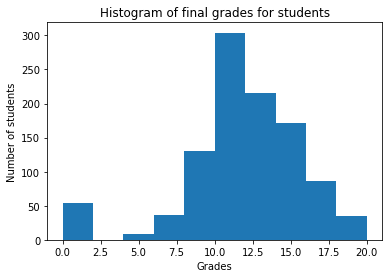

In [28]:
##Create a histogram of G3 grades to see how the data is distributed##

plt.hist(rq_2_m['G3'])
plt.title('Histogram of final grades for students')
plt.xlabel('Grades')
plt.ylabel('Number of students')
plt.show()

In [29]:
##Check for equality of variances using Levene's Test##
a1=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==0)]['G3']
a2=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==1)]['G3']
a3=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==2)]['G3']
a4=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==3)]['G3']
a5=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==4)]['G3']
a6=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==0)]['G3']
a7=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==1)]['G3']
a8=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==2)]['G3']
a9=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==3)]['G3']
a10=rq_2_m[(rq_2_m['romantic']=='yes') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==4)]['G3']
a11=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==0)]['G3']
a12=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==1)]['G3']
a13=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==2)]['G3']
a14=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==3)]['G3']
a15=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='U') & (rq_2_m['Medu']==4)]['G3']
a16=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==0)]['G3']
a17=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==1)]['G3']
a18=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==2)]['G3']
a19=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==3)]['G3']
a20=rq_2_m[(rq_2_m['romantic']=='no') & (rq_2_m['address']=='R') & (rq_2_m['Medu']==4)]['G3']

#show the number of students in each factorial cell
print(len(a1),len(a2),len(a3),len(a4),len(a5),len(a6),len(a7),len(a8),len(a9),len(a10),len(a11),len(a12),len(a13),len(a14),len(a15),len(a16),len(a17),len(a18),len(a19),len(a20))

#Run Leven's test for unequal variances 
stat, p = levene(a2, a3, a4, a5, a7, a8, a9, a10, a11,a12,a13,a14,a15,a16,a17,a18,a19,a20, center= 'median') #NB: took out group a1 and a6 because they were empty and were causing errors 
#the fact that a1 and a6 are empty show that not all 'cells' are crossed and therefore we violate a requirement in factorial ANOVA

print(stat, p)
print('The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal')



0 43 81 57 84 0 34 26 21 25 7 73 125 121 168 2 52 57 39 29
0.89113864035812 0.5848055500160816
The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal


## RQ1 -3: run 3-way ANOVA (and post hoc tests)

In [30]:
##Now conduct a three-way ANOVA after preprocessing attributes##

#preprocess 
rq_2_m[['address','romantic','Medu']] =rq_2_m[['address','romantic','Medu']].astype('object')

#conduct three-way ANOVA looking at final grades wrt romantic relationship status, address, and mother's education level 
model = ols("G3 ~ C(address,Sum) + C(romantic,Sum) + C(Medu, Helmert)+C(address,Sum)* C(romantic,Sum)*C(Medu,Helmert)", data=rq_2_m).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

#unhash to export the anova results to a csv file 
#aov_table.to_csv('three way anova.csv')

,sum_sq,df,F,PR(>F)
"C(address, Sum)",-1.100817e-12,1.0,-7.839616e-14,1.000000e+00
"C(romantic, Sum)",2.381852e+02,1.0,1.696268e+01,4.118892e-05
"C(Medu, Helmert)",4.364768e+04,4.0,7.771071e+02,1.215674e-308
"C(address, Sum):C(romantic, Sum)",1.941785e+01,1.0,1.382869e+00,2.398859e-01
"C(address, Sum):C(Medu, Helmert)",1.837070e+02,4.0,3.270735e+00,1.121303e-02
"C(romantic, Sum):C(Medu, Helmert)",5.658853e+02,4.0,1.007507e+01,5.318464e-08
"C(address, Sum):C(romantic, Sum):C(Medu, Helmert)",5.775316e+01,4.0,1.028242e+00,3.914889e-01
Residual,1.440680e+04,1026.0,NaN,NaN


In [31]:
#take out the non signficant interaction term and re-run
model = ols("G3 ~ C(address,Sum) + C(romantic,Sum) + C(Medu,Helmert)+ C(address, Sum):C(romantic, Sum) + C(address, Sum):C(Medu, Helmert) + C(romantic, Sum):C(Medu, Helmert)", data=rq_2_m).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

#unhash to export the anova results to a csv file 
#aov_table.to_csv('updated anova.csv')

,sum_sq,df,F,PR(>F)
"C(address, Sum)",92.211183,1.0,6.561604,1.056180e-02
"C(romantic, Sum)",203.542115,1.0,14.483740,1.497161e-04
"C(Medu, Helmert)",33823.625801,4.0,601.709136,1.435471e-267
"C(address, Sum):C(romantic, Sum)",21.489209,1.0,1.529139,2.165239e-01
"C(address, Sum):C(Medu, Helmert)",103.310071,4.0,1.837846,1.193328e-01
"C(romantic, Sum):C(Medu, Helmert)",361.327536,4.0,6.427876,4.141184e-05
Residual,14460.687418,1029.0,NaN,NaN


In [32]:
#take out the non signficant interaction term and re-run

model = ols("G3 ~ C(address,Sum) + C(romantic,Sum) + C(Medu,Helmert) + C(romantic, Sum):C(Medu, Helmert)", data=rq_2_m).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

#unhash to export the anova results to a csv file 
aov_table.to_csv('final anova.csv')

,sum_sq,df,F,PR(>F)
"C(address, Sum)",92.211183,1.0,6.538749,1.069676e-02
"C(romantic, Sum)",224.688702,1.0,15.932807,7.026622e-05
"C(Medu, Helmert)",38730.301286,4.0,686.597083,3.138074e-289
"C(romantic, Sum):C(Medu, Helmert)",536.215199,4.0,9.505833,1.506344e-07
Residual,14581.743975,1034.0,NaN,NaN


In [33]:
##conduct Tukey's HSD##
import statsmodels.stats.multicomp as mc

#we use code from https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/lectures/factorial-experiments.ipynb
interaction_groups = "Romantic_" + rq_2_m.romantic.astype(str) + " & " + "MotherEducation_" + rq_2_m.Medu.astype(str)

comp = mc.MultiComparison(rq_2_m['G3'], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_1,-1.6311,0.9,-5.6704,2.4082,False
Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_2,-0.9847,0.9,-4.9813,3.0119,False
Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_3,-0.4111,0.9,-4.4206,3.5984,False
Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_4,0.6148,0.9,-3.3747,4.6042,False
Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_1,-2.4228,0.6424,-6.5458,1.7002,False
Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_2,-1.4008,0.9,-5.4629,2.6612,False
Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_3,-1.7906,0.9,-5.9108,2.3296,False
Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_4,0.0082,0.9,-4.051,4.0673,False
Romantic_no & MotherEducation_1,Romantic_no & MotherEducation_2,0.6464,0.8535,-0.7132,2.006,False
Romantic_no & MotherEducation_1,Romantic_no & MotherEducation_3,1.22,0.1437,-0.1771,2.6171,False


In [34]:
##Convert above Tukey HSD results into a dataframe##
#Referred to code from https://stackoverflow.com/questions/40516810/saving-statmodels-tukey-hsd-into-a-python-pandas-dataframe

tukey_table = pd.DataFrame(data=post_hoc_res._results_table.data[1:], columns=post_hoc_res._results_table.data[0])

##Apply Bonferroni Correction and add it to the Tukey dataframe created above##

#first, create an array of the p-values from the Tukey HSD
tukey_pvalues= tukey_table['p-adj'].values

#second, run statsmodels.stats.multitest.multipletests
bonferr_pvals = statsmodels.stats.multitest.multipletests(tukey_pvalues, alpha=0.05, method='b')[1] #finds Bonferroni corrected pvalues
bonferr_reject = statsmodels.stats.multitest.multipletests(tukey_pvalues, alpha=0.05, method='b')[0] #shows whether hypothesis can be rejected given the new alpha

#third, add above corrected pvalues and rejection status to the Tukey dataframe for easy visualization 
tukey_table['bonferr_pvals']=pd.Series(bonferr_pvals)
tukey_table['bonferr_reject']=pd.Series(bonferr_reject)

##Create new column on Tukey dataframe to show whether applying the Bonferroni correction has changed the hypothesis rejection status##
tukey_table.loc[tukey_table['reject'] != tukey_table['bonferr_reject'], 'Reject changed?'] = 'Yes' 
tukey_table.loc[tukey_table['reject'] == tukey_table['bonferr_reject'], 'Reject changed?'] = '' 
display(tukey_table)

#unhash to export the tukey, bonferroni results to a csv file 
tukey_table.to_csv('posthoc.csv')


,group1,group2,meandiff,p-adj,lower,upper,reject,bonferr_pvals,bonferr_reject,Reject changed?
0,Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_1,-1.6311,0.9000,-5.6704,2.4082,False,1.0000,False,
1,Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_2,-0.9847,0.9000,-4.9813,3.0119,False,1.0000,False,
2,Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_3,-0.4111,0.9000,-4.4206,3.5984,False,1.0000,False,
3,Romantic_no & MotherEducation_0,Romantic_no & MotherEducation_4,0.6148,0.9000,-3.3747,4.6042,False,1.0000,False,
4,Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_1,-2.4228,0.6424,-6.5458,1.7002,False,1.0000,False,
5,Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_2,-1.4008,0.9000,-5.4629,2.6612,False,1.0000,False,
6,Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_3,-1.7906,0.9000,-5.9108,2.3296,False,1.0000,False,
7,Romantic_no & MotherEducation_0,Romantic_yes & MotherEducation_4,0.0082,0.9000,-4.0510,4.0673,False,1.0000,False,
8,Romantic_no & MotherEducation_1,Romantic_no & MotherEducation_2,0.6464,0.8535,-0.7132,2.0060,False,1.0000,False,
9,Romantic_no & MotherEducation_1,Romantic_no & MotherEducation_3,1.2200,0.1437,-0.1771,2.6171,False,1.0000,False,


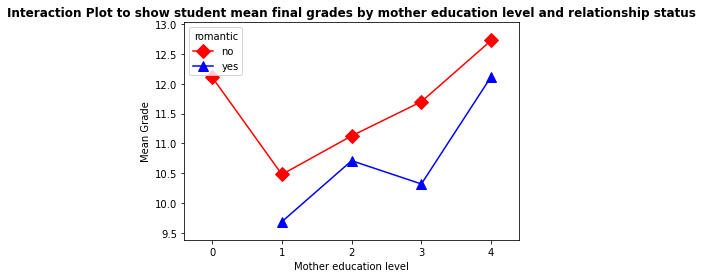

In [35]:
#plot an interaction plot 
from statsmodels.graphics.factorplots import interaction_plot

ROMANTIC = dataset['romantic'].astype("category")
final_grade = dataset['G3'].values
rq_2_interaction = interaction_plot(dataset['Medu'],ROMANTIC,final_grade,colors=['red','blue'], markers=['D','^'], ms=10)
plt.ylabel('Mean Grade')
plt.xlabel('Mother education level')
plt.title('Interaction Plot to show student mean final grades by mother education level and relationship status', fontweight='bold')
plt.show()

# RQ2: Cortez & Silva (2008) note that student alcohol consumption could affect student grades. We are thus interested in exploring whether student grades differ depending on student weekend alcohol consumption levels and academic subject

# RQ2 -1: create design chart and other visualziations 

In [36]:
#Plot Design chart 

#for Weekend alcohol consumption
walc_df = dataset.groupby(by=['Walc','subject']).count()[['index']]
walc1_df = pd.DataFrame(data=walc_df[walc_df.index.isin(['portuguese'], level=1)].values, index = ['1 -V.Low','2','3','4','5-V.High'], columns=['Portuguese'])
walc1_df['Math'] =  walc_df[walc_df.index.isin(['math'], level=1)].values

print('Weekend drinking design chart')
display(walc1_df) 

#unhash to export to csv
#walc1_df.to_csv('walcdesign.csv')

Weekend drinking design chart


,Portuguese,Math
1 -V.Low,247,151
2,150,85
3,120,80
4,87,51
5-V.High,45,28


In [37]:
#use Research py to show how weekend drinking and subject counts are distributed in dataset

#create temp dataframe 
temp2 = dataset.loc[:,["Walc", "subject"]]
temp2[["Walc",'subject']]=temp2[["Walc",'subject']].astype('object')

#create summarytable
walcsummarydf = rp.summary_cat(temp2[["Walc", "subject"]],ascending= False)
display(walcsummarydf)

#unhash to export to csv
#walcsummarydf.to_csv('walc summary.csv')

,Variable,Outcome,Count,Percent
0,Walc,1,398,38.12
1,,2,235,22.51
2,,3,200,19.16
3,,4,138,13.22
4,,5,73,6.99
5,subject,portuguese,649,62.16
6,,math,395,37.84


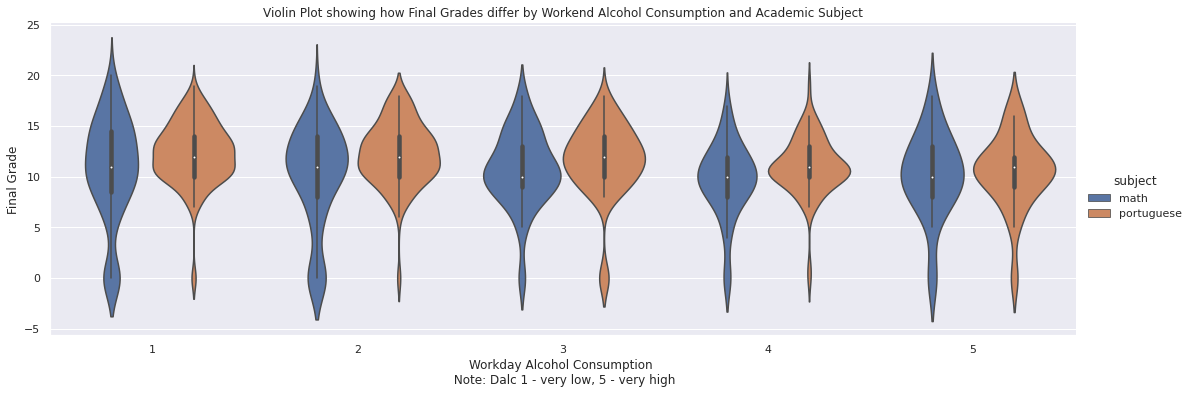

In [38]:
#violin plot for Weekend Alcohol Consumption
sns.set_theme(style="darkgrid")
sns.catplot(x="Walc", y="G3", data=dataset, dodge=True, hue="subject", kind='violin', aspect=3, legend_out = True)
plt.title('Violin Plot showing how Final Grades differ by Workend Alcohol Consumption and Academic Subject')
plt.ylabel('Final Grade')
plt.xlabel('Workday Alcohol Consumption \n Note: Dalc 1 - very low, 5 - very high')
plt.show()

# RQ2 -2: run one-way ANOVA for weekend alcohol consumption and check assumptions needed for two-way ANOVA

In [39]:
##First conduct One-way ANOVA of Walc##
#This is a deeper dive into Walc to see if students with drinking levels have different school grades

#Create a dataframe for our analysis 
walc=pd.DataFrame(columns=['Walc','G3'])
walc['Walc']= dataset.loc[:,'Walc']
walc['G3']= dataset.loc[:,'G3']

##Check for equality of variances using Levene's Test##
w1=walc[walc['Walc']==1]['G3']
w2=walc[walc['Walc']==2]['G3']
w3=walc[walc['Walc']==3]['G3']
w4=walc[walc['Walc']==4]['G3']
w5=walc[walc['Walc']==5]['G3']

#Run Leven's test for unequal variances 
stat, p = levene(w1, w2, w3, w4, w5, center= 'median') 

print(stat, p)
print('The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal')

#show the number students in each mother education level group and mean/std for students in each group 
print(len(w1),len(w2),len(w3),len(w4), len(w5))
print(w1.mean(),w2.mean(),w3.mean(),w4.mean(), w5.mean())
print(w1.std(),w2.std(),w3.std(),w4.std(),w5.std())

#conduct one-way ANOVA
model = ols('G3 ~ C(Walc)', data=walc).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

2.2008731170591935 0.06698071496105971
The above p-value is greater than 0.05 so we fail to accept the hypothesis that the variances among the groups are unequal
398 235 200 138 73
11.743718592964823 11.472340425531915 11.29 10.53623188405797 10.397260273972602
4.046287378925578 3.994959544720958 3.6856232980972687 3.185641647292016 3.7776378790463063


,sum_sq,df,F,PR(>F)
C(Walc),223.514612,4.0,3.780943,0.004641
Residual,15355.407802,1039.0,NaN,NaN


In [40]:
#Conduct a posthoc test for one-way ANOVA
post.posthoc_ttest(walc, val_col='G3', group_col='Walc', p_adjust='holm')

,1,3,2,4,5
1,1.000000,0.733293,1.000000,0.015589,0.077174
3,0.733293,1.000000,1.000000,0.311009,0.398027
2,1.000000,1.000000,1.000000,0.154989,0.299785
4,0.015589,0.311009,0.154989,1.000000,1.000000
5,0.077174,0.398027,0.299785,1.000000,1.000000


# RQ2 -3: Run two-way ANOVA 

In [41]:
#Create temp dataframe with only the columns we are interested in (Walc, subject, G3) and preprocess attributes for ANOVA 
rq_3df_walc = pd.DataFrame(columns=['Walc','subject','G3'])
rq_3df_walc['Walc'] = dataset.loc[:,'Walc']
rq_3df_walc['subject']= dataset.loc[:,'subject']
rq_3df_walc['G3']= dataset.loc[:,'G3']

rq_3df_walc['subject'] =rq_3df_walc['subject'].astype('object')

##Check for equality of variances using Levene's Test##
a1=rq_3df_walc[(rq_3df_walc['subject']=='portuguese') & (rq_3df_walc['Walc']==1)]['G3']
a2=rq_3df_walc[(rq_3df_walc['subject']=='portuguese') & (rq_3df_walc['Walc']==2)]['G3']
a3=rq_3df_walc[(rq_3df_walc['subject']=='portuguese') & (rq_3df_walc['Walc']==3)]['G3']
a4=rq_3df_walc[(rq_3df_walc['subject']=='portuguese') & (rq_3df_walc['Walc']==4)]['G3']
a5=rq_3df_walc[(rq_3df_walc['subject']=='portuguese') & (rq_3df_walc['Walc']==5)]['G3']
a6=rq_3df_walc[(rq_3df_walc['subject']=='math') & (rq_3df_walc['Walc']==1)]['G3']
a7=rq_3df_walc[(rq_3df_walc['subject']=='math') & (rq_3df_walc['Walc']==1)]['G3']
a8=rq_3df_walc[(rq_3df_walc['subject']=='math') & (rq_3df_walc['Walc']==1)]['G3']
a9=rq_3df_walc[(rq_3df_walc['subject']=='math') & (rq_3df_walc['Walc']==1)]['G3']
a10=rq_3df_walc[(rq_3df_walc['subject']=='math') & (rq_3df_walc['Walc']==1)]['G3']


stat, p = levene(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, center= 'median')
print(stat, p)
print('The above p-value is less than 0.05 so we accept the hypothesis that the variances among the groups are unequal, violating the assumption for ANOVA')

12.100835316906828 1.440869106459431e-18
The above p-value is less than 0.05 so we accept the hypothesis that the variances among the groups are unequal, violating the assumption for ANOVA


In [42]:
#conduct two-way ANOVA looking at final grades wrt weekday alc consumption and subject 
#will use deviation coding 
from statsmodels.formula.api import ols
model = ols("G3 ~ C(Walc,Helmert) + C(subject,Sum) + C(Walc,Helmert)* C(subject,Sum)", data=rq_3df_walc).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)
print('The above table shows the results for two-way ANOVA. We see there is no statistically significant interaction effect')

#unhash to export to csv 
#aov_table.to_csv('twoway.csv')

,sum_sq,df,F,PR(>F)
"C(Walc, Helmert)",224.045389,4.0,3.927382,3.595395e-03
"C(subject, Sum)",546.277766,1.0,38.303692,8.715011e-10
"C(Walc, Helmert):C(subject, Sum)",62.478066,4.0,1.095203,3.575315e-01
Residual,14746.651970,1034.0,NaN,NaN


The above table shows the results for two-way ANOVA. We see there is no statistically significant interaction effect


In [43]:
model = ols("G3 ~ C(Walc,Helmert) + C(subject,Sum) ", data=rq_3df_walc).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)

#unhash to export to csv 
#aov_table.to_csv('maineffects.csv')

,sum_sq,df,F,PR(>F)
"C(Walc, Helmert)",224.045389,4.0,3.925942,3.603830e-03
"C(subject, Sum)",546.277766,1.0,38.289644,8.763704e-10
Residual,14809.130036,1038.0,NaN,NaN


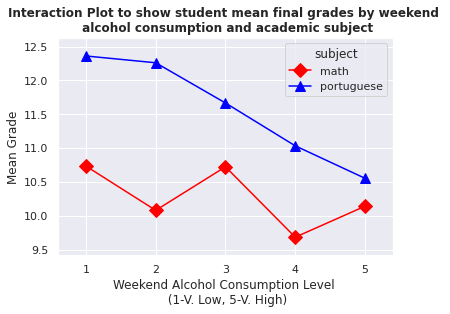

In [44]:
#plot an interaction plot for Weekend alcohol consumption
from statsmodels.graphics.factorplots import interaction_plot

subject = dataset['subject'].astype("category")
final_grade = dataset['G3'].values
rq_3_interaction = interaction_plot(dataset['Walc'],subject,final_grade,colors=['red','blue'], markers=['D','^'], ms=10)
plt.ylabel('Mean Grade')
plt.xlabel('Weekend Alcohol Consumption Level \n (1-V. Low, 5-V. High)')
plt.title('Interaction Plot to show student mean final grades by weekend \n alcohol consumption and academic subject', fontweight='bold')
plt.show()

# Appendix

Appendix (show what each attribute in the dataset files mean)

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

Below grades are related to the course subject, math or Portugese**

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)